# Librerias Necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import time
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# Base de datos obtenida de los experimientos

In [2]:
data = pd.read_csv("data_base/database.csv")

C:\Users\kapla\AppData\Local\Temp\ipykernel_5172\1432053857.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_base/database.csv")


In [3]:
database = data.loc[:, ['stime', 'proto_number', 'pkts', 'bytes', 'state_number', 'ltime',
                        'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP',
                        'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
                        'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
                        'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport','tag']]
database

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,tag
0,1.667597e+09,1,2,288,0,1.667597e+09,0.000260,1,1,66,222,22910,816,96,8,168,10,3.457078,267.567477,3,19,7692.307692,334.280461,0
1,1.667597e+09,1,3,388,0,1.667597e+09,0.000258,1,2,66,322,22910,22140,96,88,168,118,3.457078,3.235249,14,19,13513.513514,3.773346,0
2,1.667597e+09,1,15,4442,0,1.667597e+09,2.739307,5,10,2346,2096,22910,22140,96,88,168,118,3.457078,3.235249,14,19,3.089279,3.773346,0
3,1.667597e+09,1,3,576,0,1.667597e+09,0.000203,1,2,66,510,22910,22140,96,88,168,118,3.457078,3.235249,14,19,182.826498,3.773346,0
4,1.667597e+09,0,1,60,1,1.667597e+09,0.000001,1,0,60,0,60,60,1,1,13,24,1000000.000000,1000000.000000,1,1,1.878154,1.878154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595495,1.668713e+09,0,2,120,0,1.668713e+09,2.483446,1,1,60,60,120,120,2,2,16,34,0.805333,0.805333,1,1,1.567544,1.567544,0
3595496,1.668713e+09,3,2,124,3,1.668713e+09,4.730644,2,0,124,0,124,876,2,14,14,34,0.422775,0.823749,10,1,0.823749,0.823749,0
3595497,1.668713e+09,1,3,222,6,1.668713e+09,3.020596,3,0,222,0,2053476,1211,1451,11,2321,15,26.079614,2.614645,2,35,0.993181,0.989966,0
3595498,1.668713e+09,2,1,422,6,1.668713e+09,0.000001,1,0,422,0,844,10357,2,35,82,35,1000000.000000,3.748554,20,2,3.748554,3.748554,0


In [4]:
database.tag.value_counts()

1    3254077
0     341423
Name: tag, dtype: int64

# Construcción base de datos:

1. BASE_DE_DATOS_1: Datos obtenidos de los experimentos, tomando todas las muestras de tráfico sin ataque y 341423 muestras de tráfico con ataque. (Ataques de denegación de servicio).
Se utilizan 70% para entrenar y 30% para prueba.

2. BASE_DE_DATOS_2: Datos tomados en el item 1 junto con los datos utilizados en el entrenamiento inicial usando base de datos BOT-IOT y USNW-NB15.
Finalmente se tiene 741423 muestras para cada clase.
Se utilizan 70% para entrenar y 30% para prueba.

In [5]:
attack_traffic = database.loc[database.tag == 1].sample(n = 341423, random_state=1).reset_index(drop = 'true')
normal_traffic = database.loc[database.tag == 0].reset_index(drop=True)

complete_data = pd.concat([attack_traffic,normal_traffic]).reset_index(drop = 'true')
complete_data


,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,tag
0,1.667600e+09,1,16,2340,2,1.667600e+09,0.287165,6,10,764,1576,216217,223361,1483,1521,1586,1483,16.053372,15.645459,94,93,55.717096,16.053372,1
1,1.668699e+09,1,4,264,2,1.668699e+09,0.000555,2,2,132,132,32371,32371,429,429,429,429,135.328541,135.328541,100,100,7207.207207,135.328541,1
2,1.668185e+09,1,15,2245,2,1.668185e+09,0.003612,5,10,669,1576,211050,211050,1395,1395,1434,1395,4394.365132,4394.365132,93,93,4152.823920,4394.365132,1
3,1.668101e+09,1,4,264,2,1.668101e+09,0.000342,2,2,132,132,126489,126489,894,894,894,894,8.533051,8.533051,100,100,11695.906433,8.533051,1
4,1.668185e+09,1,15,2243,2,1.668185e+09,0.003222,5,10,667,1576,217589,217589,1440,1440,1467,1440,4808.543178,4808.543178,96,96,4655.493482,4808.543178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682841,1.668713e+09,0,2,120,0,1.668713e+09,2.483446,1,1,60,60,120,120,2,2,16,34,0.805333,0.805333,1,1,1.567544,1.567544,0
682842,1.668713e+09,3,2,124,3,1.668713e+09,4.730644,2,0,124,0,124,876,2,14,14,34,0.422775,0.823749,10,1,0.823749,0.823749,0
682843,1.668713e+09,1,3,222,6,1.668713e+09,3.020596,3,0,222,0,2053476,1211,1451,11,2321,15,26.079614,2.614645,2,35,0.993181,0.989966,0
682844,1.668713e+09,2,1,422,6,1.668713e+09,0.000001,1,0,422,0,844,10357,2,35,82,35,1000000.000000,3.748554,20,2,3.748554,3.748554,0


In [6]:
complete_data.to_csv("data_base_1/database1_complete.csv", index=False)

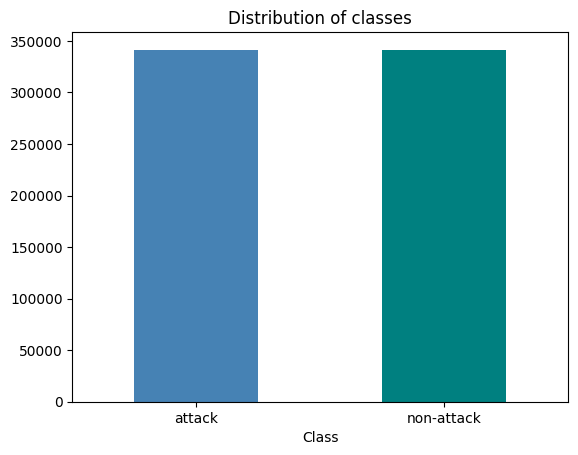

In [7]:
plt.figure()
plt.title("Distribution of classes")
complete_data.tag.value_counts().plot(kind="bar", color=['steelblue','teal'])
plt.xticks(np.arange(2), ['attack','non-attack'],rotation = 360)
plt.xlabel("Class")
plt.show()

División de los datos en entrenamiento y prueba

In [8]:
data_train, data_test = train_test_split(complete_data, test_size=0.3, random_state=16)
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

Almacenado los datos de entrenamiento y preuba

In [9]:
data_train.to_csv("data_base_1/database1_train.csv", index=False)
data_test.to_csv("data_base_1/database1_test.csv", index=False)

In [10]:
# Creando los conjuntos X e Y a partir del conjunto de datos
x_train, y_train = data_train.drop(columns=['tag']), data_train.tag
x_test, y_test = data_test.drop(columns=['tag']), data_test.tag
print('x_train: ',x_train.shape, 'y_train: ', y_train.shape)
print('\nx_test: ',x_test.shape, 'x_test: ', y_test.shape)

x_train:  (477992, 23) y_train:  (477992,)

x_test:  (204854, 23) x_test:  (204854,)


# Estandarización datos de entrenameinto

In [11]:
# Estandarizando datos de entrenamiento
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(x_train[x_train.columns])
x_train[x_train.columns] = scaler.transform(x_train[x_train.columns])

In [12]:
# Almacenado parámetros de standarización
pickle.dump(scaler, open("data_base_1/database1_scaler.pkl", 'wb'))

In [13]:
x_train.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05,4.779920e+05
mean,7.878995e-13,1.102103e-16,4.682525e-19,7.990023e-18,4.837123e-17,-2.317174e-13,2.770866e-17,1.761521e-18,-1.545977e-18,1.865578e-18,-4.786581e-18,-8.056916e-18,-1.486516e-18,1.587599e-17,-4.994694e-18,1.509557e-17,2.414102e-17,8.262056e-17,2.709919e-17,5.293483e-17,7.882251e-17,3.472501e-17,1.290593e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.532791e+00,-1.832896e+00,-4.616023e-02,-7.372233e-02,-1.112854e+00,-1.532795e+00,-7.574932e-01,-2.665960e-02,-9.749826e-02,-1.273356e-02,-8.023135e-02,-1.179674e-01,-9.452563e-02,-2.497882e-01,-2.526097e-01,-3.306599e-01,-2.214177e-01,-2.455228e-01,-1.725374e-01,-1.710649e+00,-1.580233e+00,-1.835069e-01,-2.786482e-01
25%,-2.527221e-01,-6.365311e-02,-4.516751e-02,-7.363504e-02,-7.078650e-01,-2.527209e-01,-7.562132e-01,-2.560913e-02,-9.526317e-02,-1.268324e-02,-8.019941e-02,-1.164008e-01,-9.269189e-02,-2.207093e-01,-2.191549e-01,-3.008413e-01,-2.161853e-01,-2.455133e-01,-1.725266e-01,-9.950284e-01,-1.289130e+00,-1.834991e-01,-2.786431e-01
50%,-3.537961e-02,-6.365311e-02,-4.169301e-02,-7.341426e-02,-3.028759e-01,-3.538107e-02,-5.593718e-01,-2.403343e-02,-8.632280e-02,-1.257347e-02,-7.997577e-02,-1.119742e-01,-8.747286e-02,-9.078220e-02,-7.869552e-02,-2.157833e-01,-9.370911e-02,-2.454775e-01,-1.724923e-01,6.917921e-01,6.758158e-01,-1.834701e-01,-2.786181e-01
75%,1.234909e+00,-6.365311e-02,-3.921122e-02,-7.277286e-02,1.021132e-01,1.234912e+00,1.045085e+00,-2.350820e-02,-7.961753e-02,-1.244654e-02,-7.939220e-02,-9.776364e-02,-6.466988e-02,3.873240e-02,1.033909e-01,-1.707337e-01,4.930895e-02,-2.449048e-01,-1.722337e-01,8.195815e-01,8.213674e-01,-1.797016e-01,-2.776254e-01
max,1.320360e+00,5.244076e+00,2.432327e+02,1.180172e+02,4.961982e+00,1.320361e+00,2.916555e+01,2.574055e+02,7.588445e+01,1.881451e+02,1.458773e+02,3.353264e+01,5.010386e+01,1.008310e+02,1.249166e+02,5.224097e+01,9.476118e+01,1.046645e+01,1.310951e+01,8.195815e-01,8.213674e-01,9.989609e+00,6.195355e+00


# Estandarización datos de prueba

In [14]:
scaler = pickle.load(open("data_base_1/database1_scaler.pkl", 'rb'))
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [15]:
x_test.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000,204854.000000
mean,0.002830,-0.002238,0.001865,0.003679,0.002081,0.002830,0.004773,0.001587,0.001230,0.004150,0.002883,-0.000447,0.001515,0.000631,0.000858,0.004279,-0.000504,-0.000773,0.000329,0.002919,0.001851,0.000197,0.002650
std,1.002844,0.994196,0.972298,1.028920,1.001382,1.002844,1.019096,0.969072,0.989251,1.312801,1.000519,0.993034,1.005781,0.994270,0.981738,1.003044,0.980312,0.998600,1.001165,0.998721,0.999151,1.000628,1.004798
min,-1.532790,-1.832896,-0.046160,-0.073722,-1.112854,-1.532794,-0.757493,-0.026660,-0.097498,-0.012734,-0.080231,-0.117967,-0.094526,-0.249788,-0.252610,-0.330660,-0.221418,-0.245523,-0.172537,-1.710649,-1.580233,-0.183507,-0.278648
25%,-0.252723,-0.063653,-0.044671,-0.073635,-0.707865,-0.252721,-0.756208,-0.025609,-0.095263,-0.012683,-0.080199,-0.116390,-0.092677,-0.220297,-0.218133,-0.300734,-0.216185,-0.245513,-0.172527,-0.969471,-1.289130,-0.183499,-0.278643
50%,-0.034814,-0.063653,-0.041693,-0.073414,-0.302876,-0.034811,-0.557745,-0.024033,-0.086323,-0.012573,-0.079976,-0.111974,-0.087400,-0.090370,-0.077163,-0.215783,-0.093128,-0.245478,-0.172493,0.691792,0.675816,-0.183471,-0.278618
75%,1.235055,-0.063653,-0.039211,-0.072773,0.102113,1.235053,1.089902,-0.023508,-0.079618,-0.012446,-0.079392,-0.097769,-0.064677,0.038320,0.103391,-0.170305,0.048921,-0.244929,-0.172234,0.819581,0.821367,-0.179669,-0.277602
max,1.320357,5.244076,195.294995,64.931336,4.961982,1.320360,29.171398,206.679010,73.861689,307.870097,80.388472,33.532636,50.103856,80.913178,100.252184,41.881811,76.044998,10.466448,13.109513,0.819581,0.821367,9.989609,6.195355


# Entrenamiento de los modelos de aprendizaje automático

## Árboles de decisión

In [16]:
clf = DecisionTreeClassifier(random_state=0)
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=8, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.999) total time=   3.7s
[CV 2/3] END max_depth=8, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=0.999) total time=   3.5s
[CV 3/3] END max_depth=8, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.999) total time=   3.5s
[CV 1/3] END max_depth=8, min_samples_split=4; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.999) total time=   3.3s
[CV 2/3] END max_depth=

Mejores parámetros de entrenamiento

In [17]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  DecisionTreeClassifier(max_depth=14, min_samples_split=4, random_state=0)
Mejores parámetros:  {'max_depth': 14, 'min_samples_split': 4}
Mejor puntuación (accuracy): 0.9998953955900277


Entrenando el modelo con los mejores parámetros

In [18]:
# Entrenamiento del modelo
start = time.time()
model_dt = DecisionTreeClassifier(max_depth = 14, min_samples_split=4, random_state=0).fit(x_train,y_train)
end_train = time.time()
# Predicción
pred_dt_test = model_dt.predict(x_test)
end_predict = time.time()
pred_dt_train = model_dt.predict(x_train)
time_dt_train = end_train-start
time_dt_test = end_predict-end_train

Almacenando el modelo entrenado

In [19]:
pickle.dump(model_dt, open("data_base_1/database1_model_dt.pkl", 'wb'))
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

## Bosques aleatorios

In [20]:
clf = RandomForestClassifier(random_state=0)
param = {'n_estimators':[100, 200, 300],
         'max_depth':[20, 22, 24]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  51.9s
[CV 2/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  50.4s
[CV 3/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time=  51.8s
[CV 1/3] END max_depth=20, n_estimators=200; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time= 1.8min
[CV 2/3] END max_depth=20, n_est

In [21]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  RandomForestClassifier(max_depth=20, random_state=0)
Mejores parámetros:  {'max_depth': 20, 'n_estimators': 100}
Mejor puntuación (accuracy): 0.9999623424791128


In [22]:
# Entrenamiento del modelo
start = time.time()
model_rf = RandomForestClassifier(random_state=0, n_estimators = 100,  max_depth = 20).fit(x_train,y_train)
end_train = time.time()
pred_rf_test = model_rf.predict(x_test)
end_predict = time.time()
pred_rf_train = model_rf.predict(x_train)
time_rf_train = end_train-start
time_rf_test = end_predict-end_train

In [23]:
pickle.dump(model_rf, open("data_base_1/database1_model_rf.pkl", 'wb'))
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# Regresión logística

In [24]:
clf = SGDClassifier(loss='log_loss', random_state=0)
param = {'alpha':np.logspace(-6, 1, 8),
         'penalty': ['l2','l1']}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-06, penalty=l2; acc: (train=0.980, test=0.979) auc: (train=0.998, test=0.998) f1: (train=0.980, test=0.979) precision: (train=0.968, test=0.968) recall: (train=0.992, test=0.992) total time=   5.4s
[CV 2/3] END alpha=1e-06, penalty=l2; acc: (train=0.980, test=0.980) auc: (train=0.998, test=0.998) f1: (train=0.980, test=0.980) precision: (train=0.976, test=0.977) recall: (train=0.985, test=0.984) total time=   4.5s
[CV 3/3] END alpha=1e-06, penalty=l2; acc: (train=0.977, test=0.976) auc: (train=0.998, test=0.998) f1: (train=0.977, test=0.977) precision: (train=0.973, test=0.972) recall: (train=0.981, test=0.981) total time=   5.1s
[CV 1/3] END alpha=1e-06, penalty=l1; acc: (train=0.971, test=0.970) auc: (train=0.997, test=0.997) f1: (train=0.971, test=0.970) precision: (train=0.978, test=0.978) recall: (train=0.964, test=0.963) total time=   8.1s
[CV 2/3] END alpha=1e-06, penalty=l1; acc: (train=0.972, te

c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=1.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.1s
[CV 1/3] END alpha=10.0, penalty=l2; acc: (train=0.522, test=0.522) auc: (train=0.970, test=0.970) f1: (train=0.676, test=0.676) precision: (train=0.511, test=0.511) recall: (train=1.000, test=1.000) total time=   1.0s
[CV 2/3] END alpha=10.0, penalty=l2; acc: (train=0.510, test=0.509) auc: (train=0.970, test=0.970) f1: (train=0.671, test=0.671) precision: (train=0.505, test=0.504) recall: (train=1.000, test=1.000) total time=   1.0s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=10.0, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=0.970, test=0.970) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.9s
[CV 1/3] END alpha=10.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   1.1s
[CV 2/3] END alpha=10.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   1.0s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=10.0, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.1s


In [25]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(alpha=1e-05, loss='log_loss', random_state=0)
Mejores parámetros:  {'alpha': 1e-05, 'penalty': 'l2'}
Mejor puntuación (accuracy): 0.98014401717264


In [26]:
# Entrenamiento del modelo
start = time.time()
model_lr = SGDClassifier(loss='log_loss', random_state=0, alpha = 1e-05, penalty = 'l2').fit(x_train,y_train)
end_train = time.time()
pred_lr_test = model_lr.predict(x_test)
end_predict = time.time()
pred_lr_train = model_lr.predict(x_train)
time_lr_train = end_train-start
time_lr_test = end_predict-end_train

In [27]:
pickle.dump(model_lr, open("data_base_1/database1_model_lr.pkl", 'wb'))
model_lr.get_params()

{'alpha': 1e-05,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Máquina de soporte vectorial

In [28]:
clf = SGDClassifier(loss='hinge', random_state=0)
param = {'alpha':[10**x for x in range(-5,3)],
         'penalty': ['l2','l1']}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-05, penalty=l2; acc: (train=0.983, test=0.982) auc: (train=0.998, test=0.998) f1: (train=0.983, test=0.982) precision: (train=0.980, test=0.979) recall: (train=0.985, test=0.985) total time=   1.8s
[CV 2/3] END alpha=1e-05, penalty=l2; acc: (train=0.981, test=0.981) auc: (train=0.997, test=0.997) f1: (train=0.981, test=0.982) precision: (train=0.976, test=0.977) recall: (train=0.986, test=0.987) total time=   1.5s
[CV 3/3] END alpha=1e-05, penalty=l2; acc: (train=0.979, test=0.979) auc: (train=0.998, test=0.998) f1: (train=0.979, test=0.979) precision: (train=0.975, test=0.975) recall: (train=0.983, test=0.983) total time=   1.6s
[CV 1/3] END alpha=1e-05, penalty=l1; acc: (train=0.976, test=0.975) auc: (train=0.998, test=0.998) f1: (train=0.976, test=0.975) precision: (train=0.977, test=0.976) recall: (train=0.975, test=0.974) total time=   2.0s
[CV 2/3] END alpha=1e-05, penalty=l1; acc: (train=0.975, te

c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=1, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.8s
[CV 1/3] END alpha=10, penalty=l2; acc: (train=0.507, test=0.507) auc: (train=0.969, test=0.969) f1: (train=0.670, test=0.670) precision: (train=0.503, test=0.503) recall: (train=1.000, test=1.000) total time=   0.8s
[CV 2/3] END alpha=10, penalty=l2; acc: (train=0.503, test=0.503) auc: (train=0.968, test=0.969) f1: (train=0.668, test=0.668) precision: (train=0.501, test=0.501) recall: (train=1.000, test=1.000) total time=   0.8s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=10, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=0.970, test=0.970) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.8s
[CV 1/3] END alpha=10, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   0.9s
[CV 2/3] END alpha=10, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   0.9s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=10, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.0s
[CV 1/3] END alpha=100, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=0.969, test=0.969) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   0.8s
[CV 2/3] END alpha=100, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=0.968, test=0.969) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   0.8s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=100, penalty=l2; acc: (train=0.500, test=0.500) auc: (train=0.969, test=0.969) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.8s
[CV 1/3] END alpha=100, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   1.0s
[CV 2/3] END alpha=100, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.500, test=0.500) recall: (train=1.000, test=1.000) total time=   0.9s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3] END alpha=100, penalty=l1; acc: (train=0.500, test=0.500) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.9s


In [30]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(alpha=1e-05, random_state=0)
Mejores parámetros:  {'alpha': 1e-05, 'penalty': 'l2'}
Mejor puntuación (accuracy): 0.9806795887794806


In [31]:
# Entrenamiento del modelo
start = time.time()
model_svm_linear = SGDClassifier(loss='hinge', random_state=0, alpha = 1e-05, penalty = 'l2').fit(x_train,y_train)
end_train = time.time()
pred_svm_linear_test = model_svm_linear.predict(x_test)
end_predict = time.time()
pred_svm_linear_train = model_svm_linear.predict(x_train)
time_svm_linear_train = end_train-start
time_svm_linear_test = end_predict-end_train

In [32]:
pickle.dump(model_svm_linear, open("data_base_1/database1_model_svm_linear.pkl", 'wb'))
model_svm_linear.get_params()

{'alpha': 1e-05,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Méticas de rendimiento de los modelos

## Datos de entrenamiento

In [33]:
def calculate_metrics(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision_1 = metrics.precision_score(y_true, y_pred)
    precision_0 = metrics.precision_score(y_true, y_pred, pos_label=0)
    precision_avg = metrics.precision_score(y_true, y_pred, average='macro')
    recall_1 = metrics.recall_score(y_true, y_pred)
    recall_0 = metrics.recall_score(y_true, y_pred, pos_label=0)
    recall_avg = metrics.recall_score(y_true, y_pred, average='macro')
    f1_score_1 = metrics.f1_score(y_true, y_pred)
    f1_score_0 = metrics.f1_score(y_true, y_pred, pos_label=0)
    f1_score_avg = metrics.f1_score(y_true, y_pred, average='macro')
    return [accuracy, precision_1, precision_0, precision_avg, recall_1, recall_0, recall_avg, f1_score_1, f1_score_0, \
           f1_score_avg, confusion_matrix]

In [34]:
metric_dt_train = calculate_metrics(y_train, pred_dt_train)
metric_dt_train.append(time_dt_train)

metric_rf_train = calculate_metrics(y_train, pred_rf_train)
metric_rf_train.append(time_rf_train)

metric_lr_train = calculate_metrics(y_train, pred_lr_train)
metric_lr_train.append(time_lr_train)

metric_svm_linear_train = calculate_metrics(y_train, pred_svm_linear_train)
metric_svm_linear_train.append(time_svm_linear_train)

metric_train = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix','Time'])

metric_train.loc['DT'] = metric_dt_train
metric_train.loc['RF'] = metric_rf_train
metric_train.loc['LR'] = metric_lr_train
metric_train.loc['SVM_LINEAR'] = metric_svm_linear_train

metric_train

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix,Time
DT,0.999925,1.0,0.99985,0.999925,0.999849,1.0,0.999925,0.999925,0.999925,0.999925,"[[239226, 0], [36, 238730]]",8.688802
RF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[239226, 0], [0, 238766]]",92.795441
LR,0.978592,0.964757,0.993245,0.979001,0.993433,0.963779,0.978606,0.978885,0.97829,0.978588,"[[230561, 8665], [1568, 237198]]",2.154973
SVM_LINEAR,0.98197,0.975851,0.988237,0.982044,0.988365,0.975588,0.981977,0.982068,0.981872,0.98197,"[[233386, 5840], [2778, 235988]]",2.137954


## Datos de prueba

In [35]:
metric_dt_test = calculate_metrics(y_test, pred_dt_test)
metric_dt_test.append(time_dt_test)

metric_rf_test = calculate_metrics(y_test, pred_rf_test)
metric_rf_test.append(time_rf_test)

metric_lr_test = calculate_metrics(y_test, pred_lr_test)
metric_lr_test.append(time_lr_test)

metric_svm_linear_test = calculate_metrics(y_test, pred_svm_linear_test)
metric_svm_linear_test.append(time_svm_linear_test)

metric_test = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix','Time'])

metric_test.loc['DT'] = metric_dt_test
metric_test.loc['RF'] = metric_rf_test
metric_test.loc['LR'] = metric_lr_test
metric_test.loc['SVM_LINEAR'] = metric_svm_linear_test

metric_test

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix,Time
DT,0.999932,0.999971,0.999892,0.999932,0.999893,0.999971,0.999932,0.999932,0.999932,0.999932,"[[102194, 3], [11, 102646]]",0.055003
RF,0.999995,1.0,0.99999,0.999995,0.99999,1.0,0.999995,0.999995,0.999995,0.999995,"[[102197, 0], [1, 102656]]",1.516078
LR,0.97921,0.965829,0.99345,0.97964,0.993668,0.964686,0.979177,0.979551,0.978857,0.979204,"[[98588, 3609], [650, 102007]]",0.025026
SVM_LINEAR,0.982246,0.976296,0.988375,0.982336,0.988574,0.97589,0.982232,0.982396,0.982093,0.982245,"[[99733, 2464], [1173, 101484]]",0.027993


# Matriz de confusión de los modelos

In [36]:
def confusion_matrix_graf(confusion_matrix, title = 'Confusion Matrix'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['non-attack', 'attack']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix,
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)

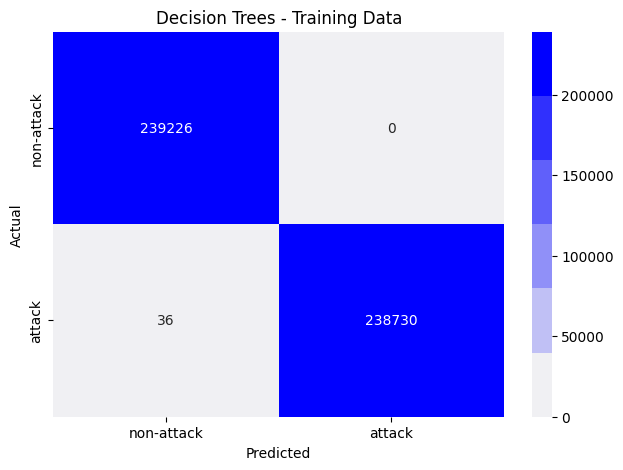

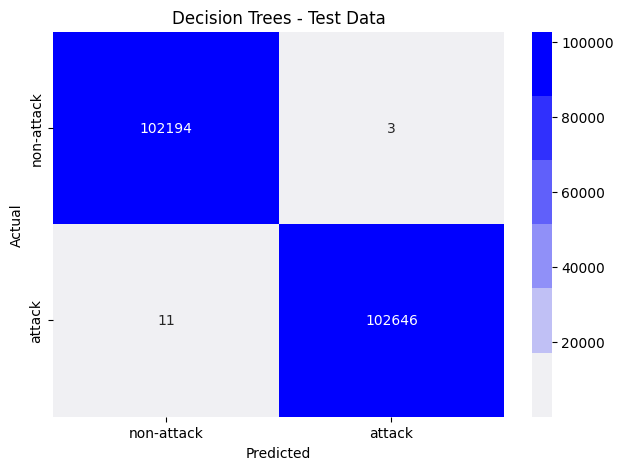

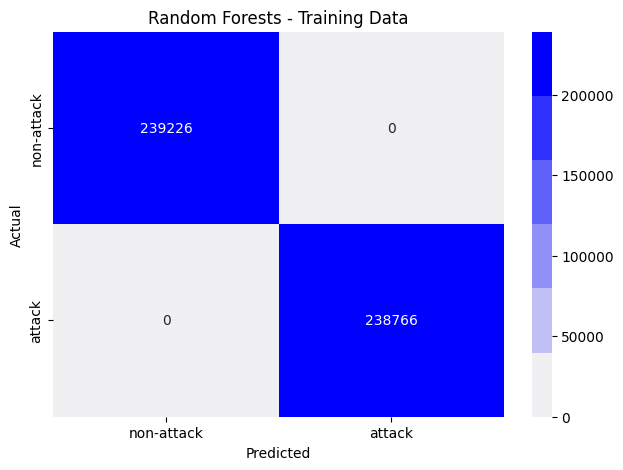

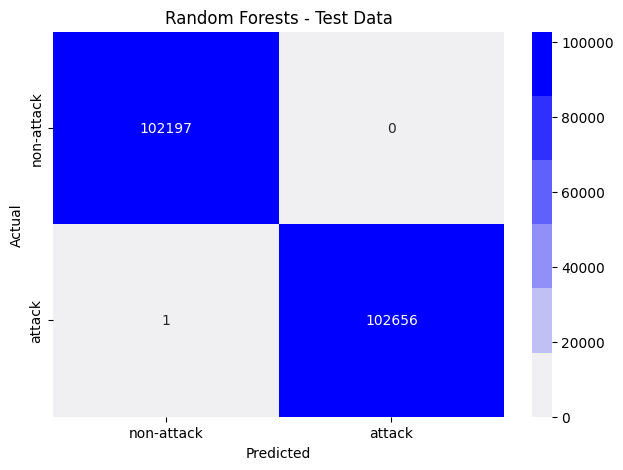

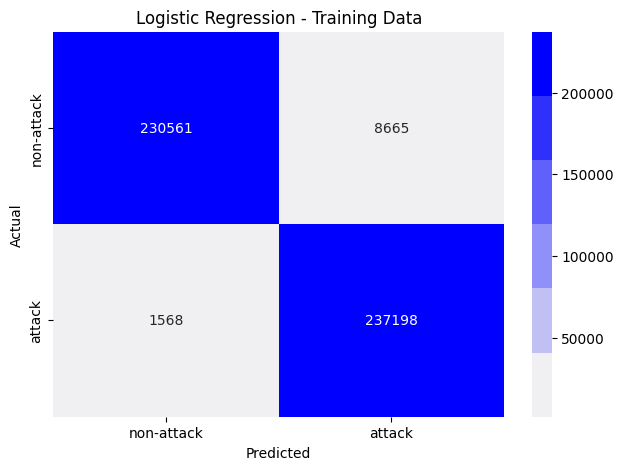

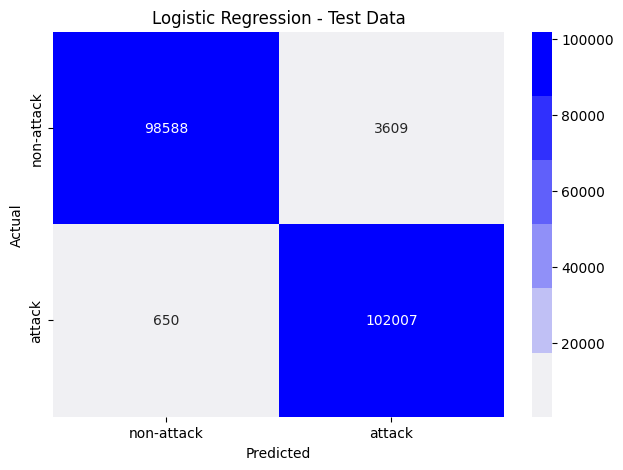

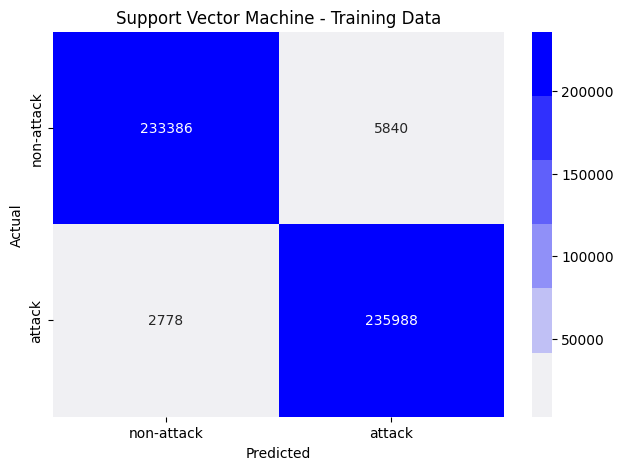

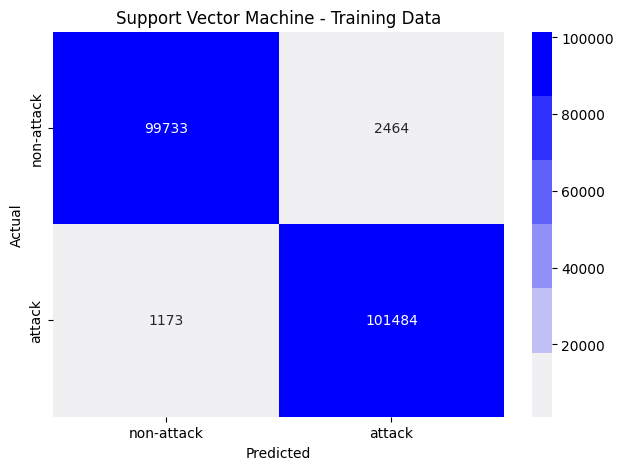

In [37]:
confusion_matrix_graf(metric_dt_train[-2],"Decision Trees - Training Data")
confusion_matrix_graf(metric_dt_test[-2], "Decision Trees - Test Data")

confusion_matrix_graf(metric_rf_train[-2],"Random Forests - Training Data")
confusion_matrix_graf(metric_rf_test[-2], "Random Forests - Test Data")

confusion_matrix_graf(metric_lr_train[-2],"Logistic Regression - Training Data")
confusion_matrix_graf(metric_lr_test[-2], "Logistic Regression - Test Data")

confusion_matrix_graf(metric_svm_linear_train[-2],"Support Vector Machine - Training Data")
confusion_matrix_graf(metric_svm_linear_test[-2], "Support Vector Machine - Training Data")